<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/GOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [269]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [270]:
#Get the stock quote
data = yf.download('GOOG', start=start_date, end=end_date)
#df = web.DataReader('GOOG', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...
2021-07-15,2650.000000,2651.899902,2611.959961,2625.330078,2625.330078,829300
2021-07-16,2632.820068,2643.659912,2616.429932,2636.909912,2636.909912,742800
2021-07-19,2623.110107,2624.939941,2570.739990,2585.080078,2585.080078,1285500


In [271]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

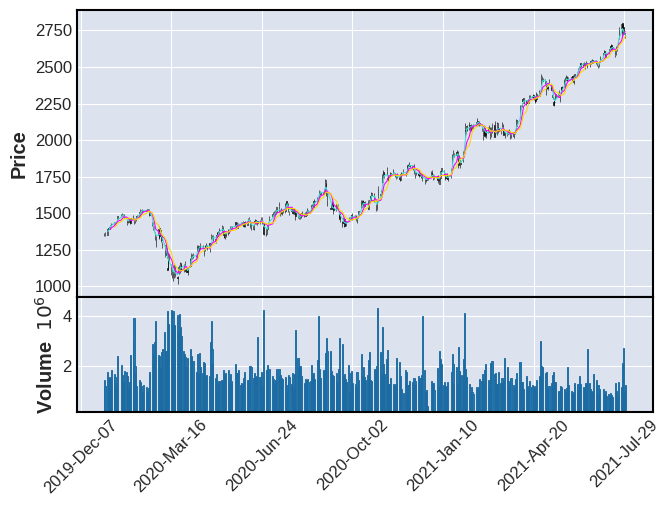

In [272]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [273]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [274]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.17897563],
       [0.17511105],
       [0.19443404],
       [0.19393297],
       [0.20025686],
       [0.2091898 ],
       [0.2148917 ],
       [0.2203632 ],
       [0.21555405],
       [0.2203459 ],
       [0.22754524],
       [0.24406921],
       [0.24637876],
       [0.24727144],
       [0.24767464],
       [0.23619022],
       [0.21729342],
       [0.22804062],
       [0.23153659],
       [0.22992967],
       [0.21748346],
       [0.24726567],
       [0.2248786 ],
       [0.22554672],
       [0.24167325],
       [0.24340109],
       [0.26036278],
       [0.26042613],
       [0.2658861 ],
       [0.26380693],
       [0.26730867],
       [0.26669244],
       [0.27073553],
       [0.26581699],
       [0.24678766],
       [0.21020348],
       [0.19111657],
       [0.19384086],
       [0.15059293],
       [0.16282605],
       [0.19149672],
       [0.16401253],
       [0.19000504],
       [0.15114012],
       [0.13925833],
       [0.0915411 ],
       [0.12887974],
       [0.091

In [275]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.17897563, 0.17511105, 0.19443404, 0.19393297, 0.20025686,
       0.2091898 , 0.2148917 , 0.2203632 , 0.21555405, 0.2203459 ,
       0.22754524, 0.24406921, 0.24637876, 0.24727144, 0.24767464,
       0.23619022, 0.21729342, 0.22804062, 0.23153659, 0.22992967,
       0.21748346, 0.24726567, 0.2248786 , 0.22554672, 0.24167325,
       0.24340109, 0.26036278, 0.26042613, 0.2658861 , 0.26380693,
       0.26730867, 0.26669244, 0.27073553, 0.26581699, 0.24678766,
       0.21020348, 0.19111657, 0.19384086, 0.15059293, 0.16282605,
       0.19149672, 0.16401253, 0.19000504, 0.15114012, 0.13925833,
       0.0915411 , 0.12887974, 0.0914547 , 0.03357199, 0.09394276,
       0.01595948, 0.03638838, 0.02314159, 0.03379085, 0.00904234,
       0.        , 0.04483172, 0.0264187 , 0.06054934, 0.03115297])]
[0.05195042044084297]



In [276]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [277]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [278]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [279]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 13s 36ms/step - loss: 0.0087


In [280]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [281]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [282]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [283]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

48.248488800435126

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


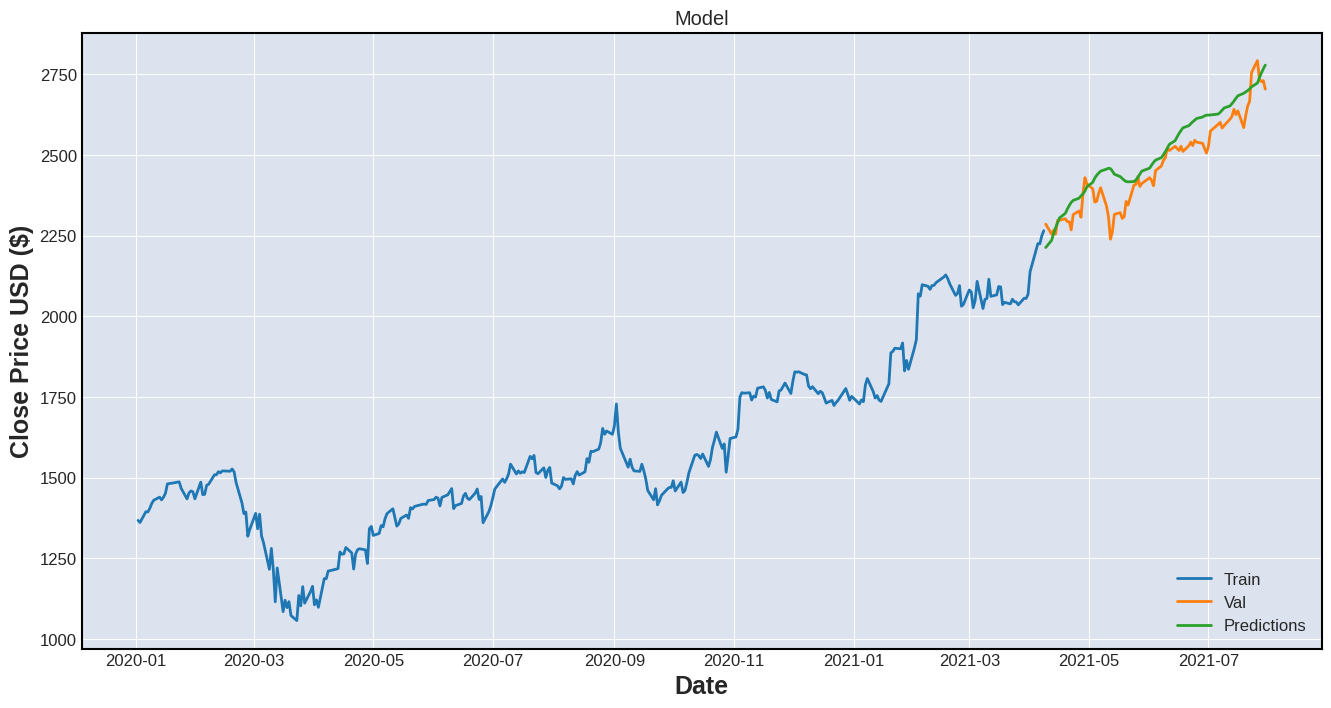

In [284]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [285]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,2285.879883,2213.286133
2021-04-12,2254.790039,2235.630615
2021-04-13,2267.270020,2255.705078
2021-04-14,2254.840088,2274.073975
2021-04-15,2296.659912,2289.625977
...,...,...
2021-07-26,2792.889893,2723.380371
2021-07-27,2735.929932,2739.567871
2021-07-28,2727.629883,2754.394775


In [286]:
#get the quote
apple_quote = yf.download('GOOG', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[2787.0325]]
